Segmentação de Clientes para Marketing


**1. Objetivo do Projeto**

O objetivo do projeto é aplicar análise exploratória de dados em um conjunto de dados de clientes com informações demográficas, comportamentais e de consumo para gerar insights que possam apoiar as decisões do Marketing.

**2. Problema de Negócio**

Como podemos segmentar os clientes em perfis distintos para orientar estratégias de marketing mais personalizadas e eficientes?

**3. Focos da Análise**

- Entender o perfil dos clientes da base

- Identificar padrões de comportamento de consumo

- Verificar relações entre variáveis (renda, gastos, filhos, escolaridade etc.)

- Gerar insights acionáveis para o negócio

**4. Perguntas Analíticas Respondidas**

Quantos registros e variáveis existem na base?

Quais variáveis são numéricas e quais são categóricas?

Existem dados nulos ou duplicados?

In [ ]:
# Importando bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Ler dados de um arquivo.csv

df = pd.read_csv("/content/mkt_data.csv")
df

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,0,58138.0,0,0,58,635,88,546,172,88,...,3.0,NaN,NaN,1529,1441,0,Single,Graduation,0,1529
1,1,46344.0,1,1,38,11,1,6,2,1,...,3.0,NaN,NaN,21,15,0,Single,Graduation,2,21
2,2,71613.0,0,0,26,426,49,127,111,21,...,3.0,NaN,NaN,734,692,0,Together,Graduation,0,734
3,3,26646.0,1,0,26,11,4,20,10,3,...,3.0,NaN,NaN,48,43,0,Together,Graduation,1,48
4,4,58293.0,1,0,94,173,43,118,46,27,...,NaN,NaN,5.0,407,392,0,Married,PhD,1,407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2200,61223.0,0,1,46,709,43,182,42,118,...,3.0,NaN,NaN,1094,847,0,Married,Graduation,1,1094
2201,2201,64014.0,2,1,56,406,0,30,0,0,...,NaN,NaN,5.0,436,428,1,Together,PhD,3,436
2202,2202,56981.0,0,0,91,908,48,217,32,12,...,3.0,NaN,NaN,1217,1193,1,Divorced,Graduation,0,1217
2203,2203,69245.0,0,1,8,428,30,214,80,30,...,NaN,4.0,NaN,782,721,0,Together,Master,1,782


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2205 non-null   int64  
 1   Income                2205 non-null   float64
 2   Kidhome               2205 non-null   int64  
 3   Teenhome              2205 non-null   int64  
 4   Recency               2205 non-null   int64  
 5   MntWines              2205 non-null   int64  
 6   MntFruits             2205 non-null   int64  
 7   MntMeatProducts       2205 non-null   int64  
 8   MntFishProducts       2205 non-null   int64  
 9   MntSweetProducts      2205 non-null   int64  
 10  MntGoldProds          2205 non-null   int64  
 11  NumDealsPurchases     2205 non-null   int64  
 12  NumWebPurchases       2205 non-null   int64  
 13  NumCatalogPurchases   2205 non-null   int64  
 14  NumStorePurchases     2205 non-null   int64  
 15  NumWebVisitsMonth    

In [ ]:
#Remover duplicatas

df.duplicated().sum() #Verificar a existência de duplicatas

df = df.drop_duplicates() #Remover

In [ ]:
#Verificar se há nulos

print(df.isnull().sum())

Unnamed: 0                 0
Income                     0
Kidhome                    0
Teenhome                   0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Z_CostContact              0
Z_Revenue                  0
Response                   0
Age                        0
Customer_Days              0
marital_Divorced        1975
marital_Married         1351
marital_Single          1728
marital_Together        1637
marital_Widow           2129
education_2n Cycle      2007
education_Basic         2151
education_Grad

A base possui 2205 registros e 44 variáveis. A maioria das váriaveis são númericas, com algumas variáveis categóricas, como estado civil e nível de escolaridade.

*4.2 Perfil dos Clientes*

Qual é a distribuição de renda dos clientes?

Qual o nível de escolaridade predominante?

Como está distribuído o estado civil?

A maioria dos clientes possui filhos?

<Axes: ylabel='Income'>

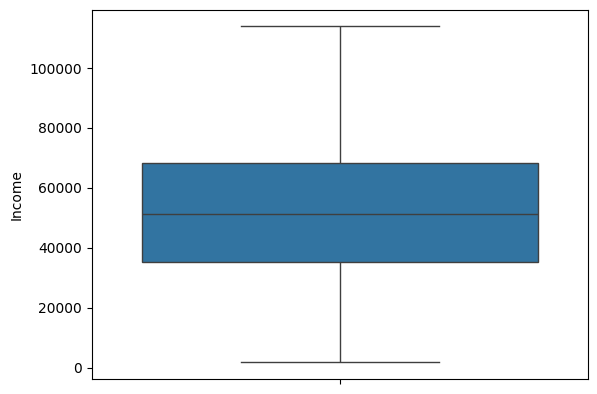

In [ ]:
#-	Qual é a distribuição de salário na nossa base? Temos clientes que ganham muito bem e outros que não ganham muito bem? Veja na coluna Income

sns.boxplot(df.Income)




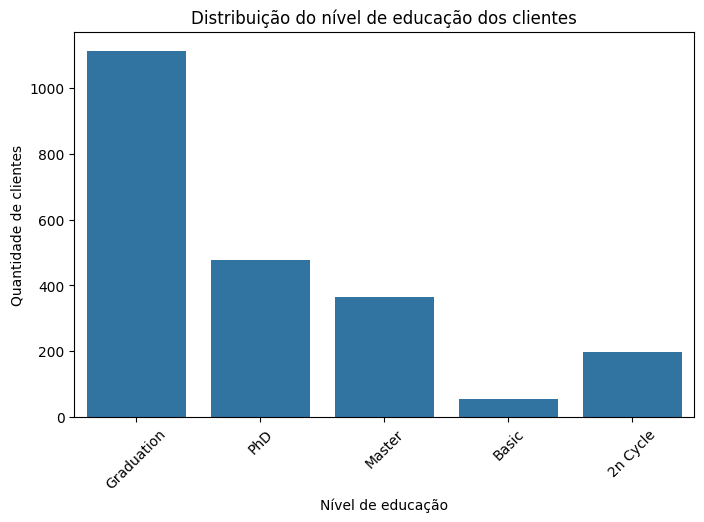

In [ ]:
#-	Nossos clientes tem níveis de educação maiores ou menores? Veja na coluna education_level

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='education_level')
plt.title('Distribuição do nível de educação dos clientes')
plt.xlabel('Nível de educação')
plt.ylabel('Quantidade de clientes')
plt.xticks(rotation=45)
plt.show()


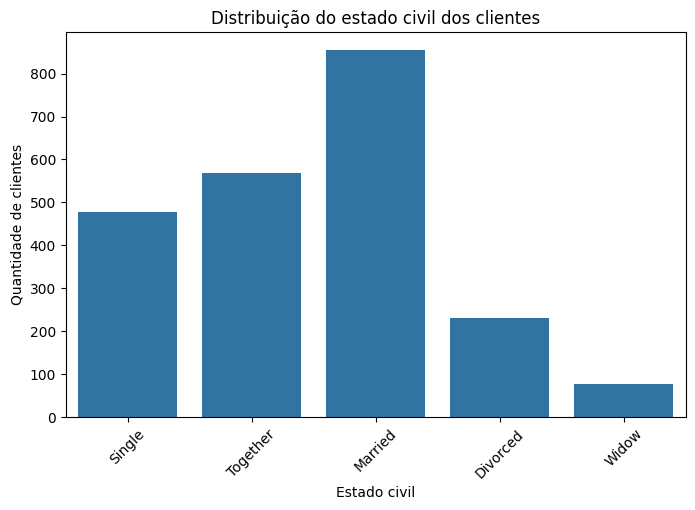

In [ ]:
# -	Quantos clientes temos em cada estado civil? Veja na coluna marital_status

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='marital_status')
plt.title('Distribuição do estado civil dos clientes')
plt.xlabel('Estado civil')
plt.ylabel('Quantidade de clientes')
plt.xticks(rotation=45)
plt.show()

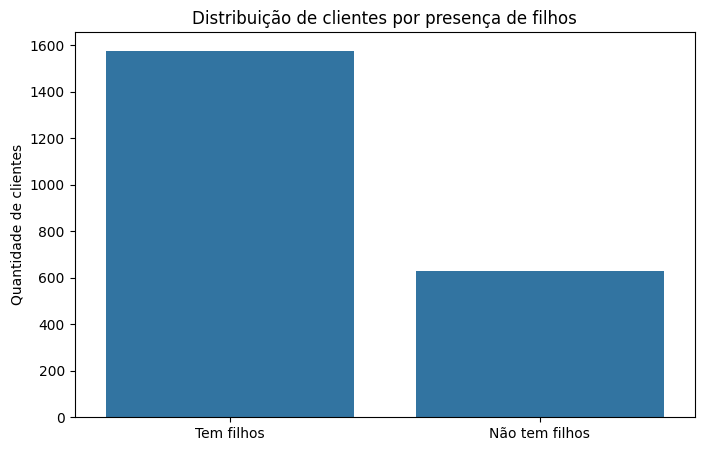

In [ ]:
df['tem_filhos'] = df['kids'] > 0

contagem = df['tem_filhos'].value_counts().reindex([True, False])

# Gráfico
plt.figure(figsize=(8,5))
sns.barplot(x=['Tem filhos', 'Não tem filhos'], y=contagem.values)

plt.ylabel('Quantidade de clientes')
plt.title('Distribuição de clientes por presença de filhos')

plt.show()

- A renda dos clientes concentra-se principalmente entre 35 mil e 65 mil, com mediana próxima de 50 mil. A presença de outliers indica um pequeno grupo com renda mais alta.

- O nível de escolaridade predominante é a graduação.

- A base de clientes é majoritariamente composta por pessoas casadas e em relacionamento.

- A grande maioria dos clientes possui filhos, o que idica um perfil familiar predominante.

*4.3 Comportamento de consumo*

Clientes com maior renda gastam mais?

Clientes com filhos gastam mais ou menos?

Existe diferença de gastos entre estados civis?

Clientes que aceitaram campanhas apresentam maior gasto?

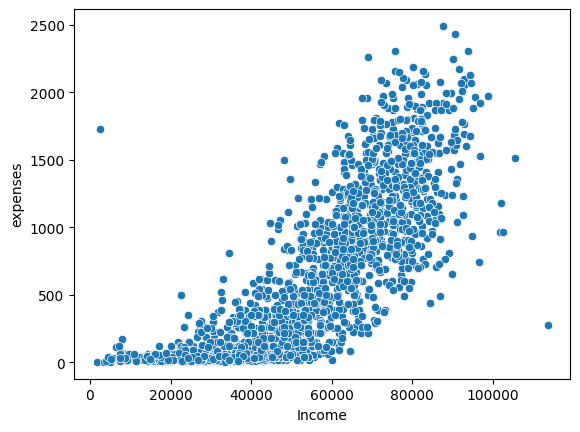

In [ ]:
# Pessoas que têm um maior salário gastam mais? Veja nas colunas Income e expenses

sns.scatterplot(x="Income", y="expenses", data=df)
plt.show()

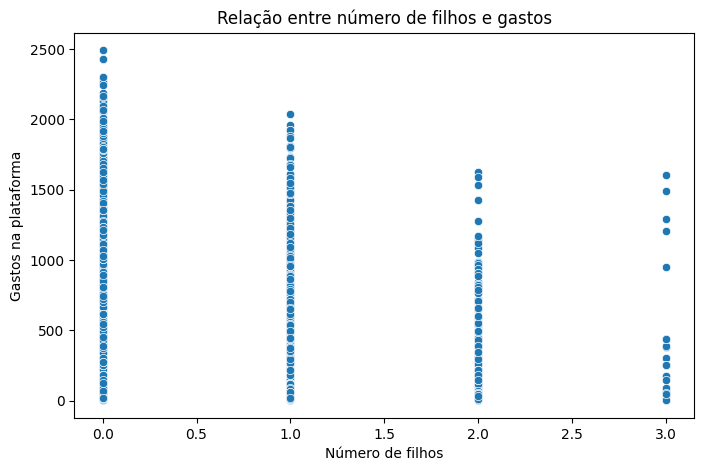

In [ ]:
#As pessoas gastam mais ou menos em nossa plataforma quando têm filhos? Veja nas colunas expenses e kids

plt.figure(figsize=(8,5))

sns.scatterplot(data=df, x='kids', y='expenses')

plt.title('Relação entre número de filhos e gastos')
plt.xlabel('Número de filhos')
plt.ylabel('Gastos na plataforma')

plt.show()

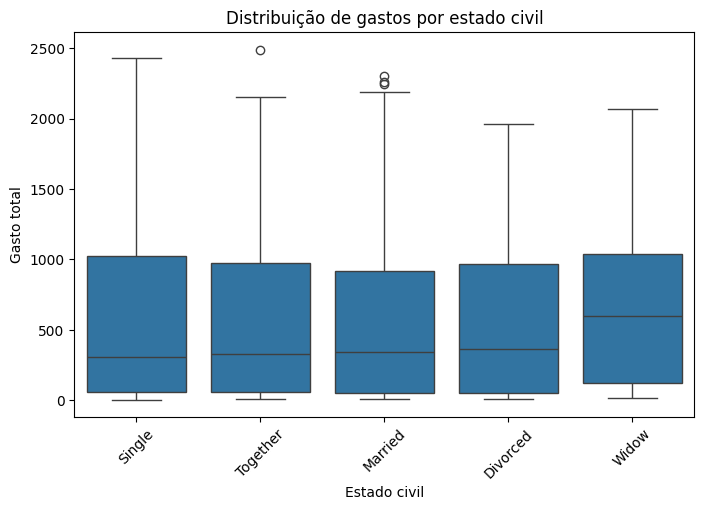

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='marital_status', y='expenses', data=df)
plt.xticks(rotation=45)
plt.title('Distribuição de gastos por estado civil')
plt.xlabel('Estado civil')
plt.ylabel('Gasto total')
plt.show()


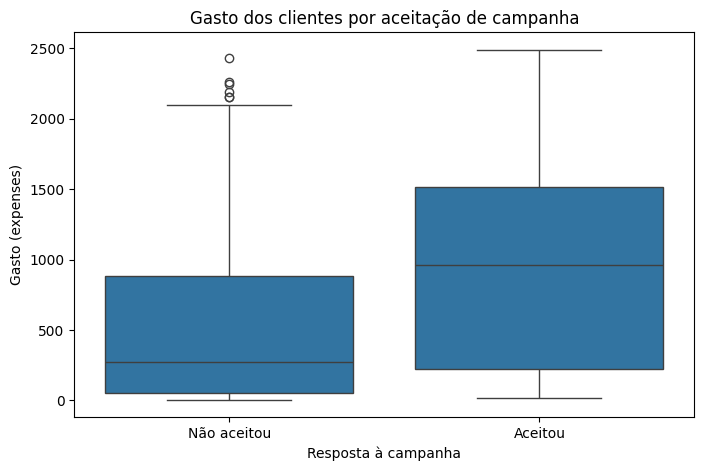

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Response', y='expenses', data=df)

plt.xticks([0,1], ['Não aceitou', 'Aceitou'])
plt.xlabel('Resposta à campanha')
plt.ylabel('Gasto (expenses)')
plt.title('Gasto dos clientes por aceitação de campanha')

plt.show()


- Há uma relação positiva entre renda e gastos, ainda que o comportamento de consumo varie entre clientes com a mesma renda.

- Clientes sem filhos concentram o maior gasto, enquanto clientes com mais filhos tendem a gastos mais moderados.

- Há diferenças nas medianas de gasto entre os estados civis, com destaque para clientes viúvos, mas a grande sobreposição sugere que o estado civil não é o único fator determinante do nível de gastos.

- Clientes que aceitaram a campanha apresentam um gasto maior, demonstrando uma relação positiva entre consumo e aceitação.

*4.4 Relações entre variáveis*

Qual a relação entre renda e gastos?

Qual a relação entre número de filhos e gastos?

Qual a relação entre engajamento (visitas/compras online) e gastos?


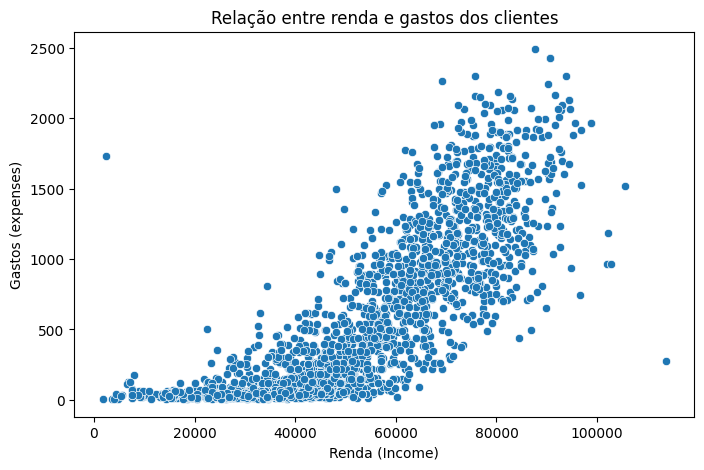

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Income', y='expenses', data=df)

plt.xlabel('Renda (Income)')
plt.ylabel('Gastos (expenses)')
plt.title('Relação entre renda e gastos dos clientes')

plt.show()

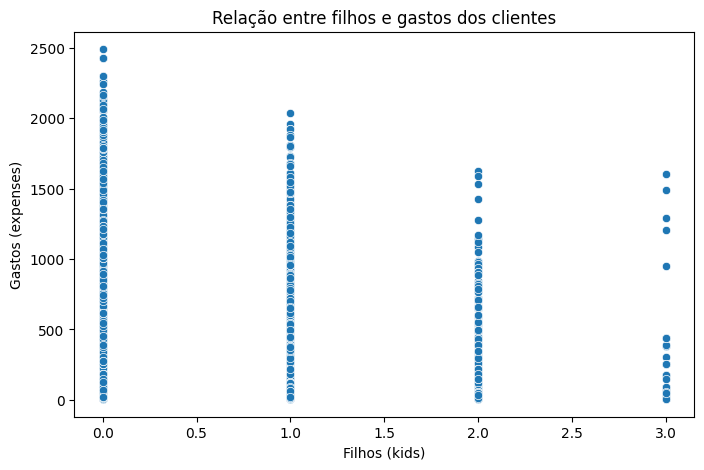

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='kids', y='expenses', data=df)

plt.xlabel('Filhos (kids)')
plt.ylabel('Gastos (expenses)')
plt.title('Relação entre filhos e gastos dos clientes')

plt.show()

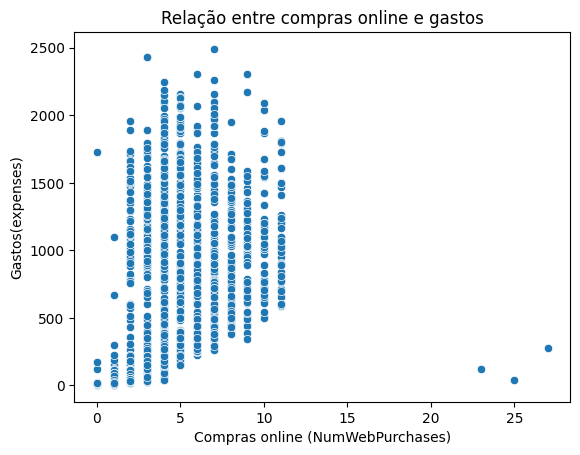

In [ ]:
sns.scatterplot(x='NumWebPurchases', y='expenses', data=df)

plt.xlabel('Compras online (NumWebPurchases)')
plt.ylabel('Gastos(expenses)')
plt.title('Relação entre compras online e gastos')
plt.show()


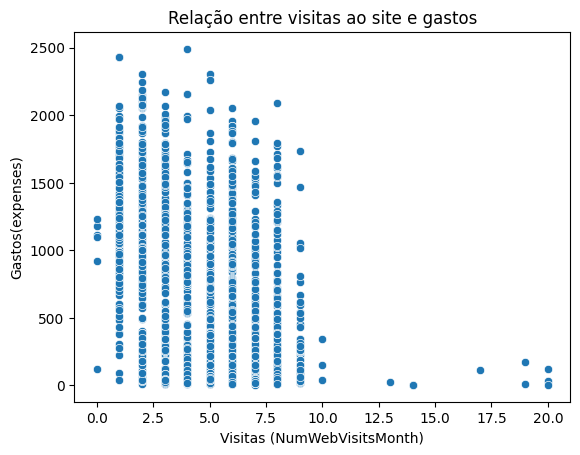

In [ ]:
sns.scatterplot(x='NumWebVisitsMonth', y='expenses', data=df)

plt.xlabel('Visitas (NumWebVisitsMonth)')
plt.ylabel('Gastos(expenses)')
plt.title('Relação entre visitas ao site e gastos')
plt.show()

- Embora clientes de maior renda tendam a gastar mais, a dispersão dos dados indica a influência de outros fatores no comportamento de consumo.

- Clientes sem filhos tendem a apresentar maiores níveis de gasto. Observa-se que, conforme o número de filhos aumenta, os gastos tendem a diminuir.

- O número de visitas não apresenta correlação clara com os gastos, indicando que visitas frequentes não garantem maior consumo.

*4.5 Segmentação e oportunidades*

Existe um grupo com alta renda e baixo gasto?

Existe um perfil de cliente mais engajado digitalmente?

Quais perfis parecem mais estratégicos para campanhas?

- Há um grupo de clientes com alta renda e baixo gasto, indicando um potencial de consumo ainda não explorado.

- Observa-se um perfil mais engajado, mas com gasto reduzidos.

- Os perfis mais esratégicos são: clientes com alta renda e alto gasto, para fidelização; clientes de alta renda e baixo gasto, para estímulo à conversão; e clientes com alto engajamento e baixo gasto, para ofertas padronizadas.